<a href="https://colab.research.google.com/github/amritha-dev/Stroke_Prediction_using_ML/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **STROKE PREDICTION USING ML:**


In [ ]:
import pandas as pd
import numpy as np

# Data collection:

 To read the csv file:

In [ ]:

data=pd.read_csv('/content/drive/MyDrive/datascience/project/healthcare-dataset-stroke-data.csv')

# Number of rows and columns:
data.shape

(5110, 12)

5110 rows and 12 columns

In [ ]:
# To show first 5 rows of dataset:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:

# To show last 5 rows of dataset:
data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Information about data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


To describe the complete data in order to have general understanding about data (Count, Mean, std etc):

In [ ]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Cleaning:

To remove unneccessary column:

In [ ]:
data= data.drop('id', axis=1)

To check the null values:

In [ ]:
data.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [ ]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Column bmi has 201 null values

In [ ]:
data['bmi'].unique()

array([36.6,  nan, 32.5, 34.4, 24. , 29. , 27.4, 22.8, 24.2, 29.7, 36.8,
       27.3, 28.2, 30.9, 37.5, 25.8, 37.8, 22.4, 48.9, 26.6, 27.2, 23.5,
       28.3, 44.2, 25.4, 22.2, 30.5, 26.5, 33.7, 23.1, 32. , 29.9, 23.9,
       28.5, 26.4, 20.2, 33.6, 38.6, 39.2, 27.7, 31.4, 36.5, 33.2, 32.8,
       40.4, 25.3, 30.2, 47.5, 20.3, 30. , 28.9, 28.1, 31.1, 21.7, 27. ,
       24.1, 45.9, 44.1, 22.9, 29.1, 32.3, 41.1, 25.6, 29.8, 26.3, 26.2,
       29.4, 24.4, 28. , 28.8, 34.6, 19.4, 30.3, 41.5, 22.6, 56.6, 27.1,
       31.3, 31. , 31.7, 35.8, 28.4, 20.1, 26.7, 38.7, 34.9, 25. , 23.8,
       21.8, 27.5, 24.6, 32.9, 26.1, 31.9, 34.1, 36.9, 37.3, 45.7, 34.2,
       23.6, 22.3, 37.1, 45. , 25.5, 30.8, 37.4, 34.5, 27.9, 29.5, 46. ,
       42.5, 35.5, 26.9, 45.5, 31.5, 33. , 23.4, 30.7, 20.5, 21.5, 40. ,
       28.6, 42.2, 29.6, 35.4, 16.9, 26.8, 39.3, 32.6, 35.9, 21.2, 42.4,
       40.5, 36.7, 29.3, 19.6, 18. , 17.6, 19.1, 50.1, 17.7, 54.6, 35. ,
       22. , 39.4, 19.7, 22.5, 25.2, 41.8, 60.9, 23

Instead of dropping the null values, fill it with mean values

In [ ]:
data['bmi']=data['bmi'].fillna(data['bmi'].mean())

In [ ]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Now there is no null values found

In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Age cannot be float , so we need to convert it into integer.

In [ ]:
data['age']=data['age'].astype(int)

To check the value_counts of columns having  datatype as object:

In [ ]:
data['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [ ]:
data['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [ ]:
data['ever_married'].value_counts()

ever_married
Yes    3353
No     1757
Name: count, dtype: int64

In [ ]:
data['Residence_type'].value_counts()

Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

In [ ]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Since value count of 'Other' in 'gender' column is very less. So, we can drop it

In [ ]:
#To find the index of 'gender' column having data as 'Other':

row_index = data.index[data['gender']=='Other']
row_index

Index([3116], dtype='int64')

In [ ]:
#To drop the row having 'Other' in 'gender' column:
data.drop(row_index, inplace=True)


In [ ]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

Unneccessary row got removed from the dataset.




In [ ]:
data.shape

(5109, 11)

To check the outliers

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

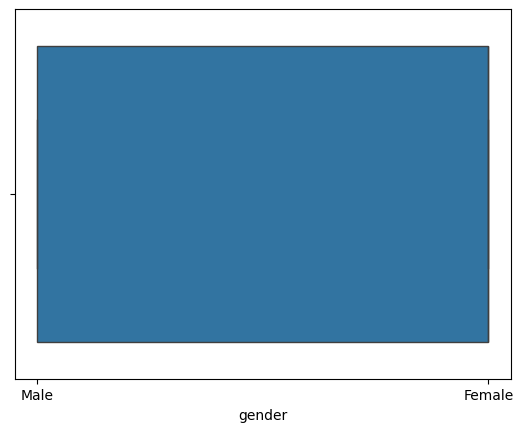

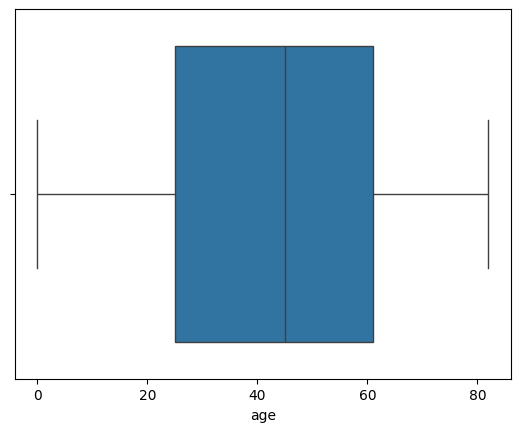

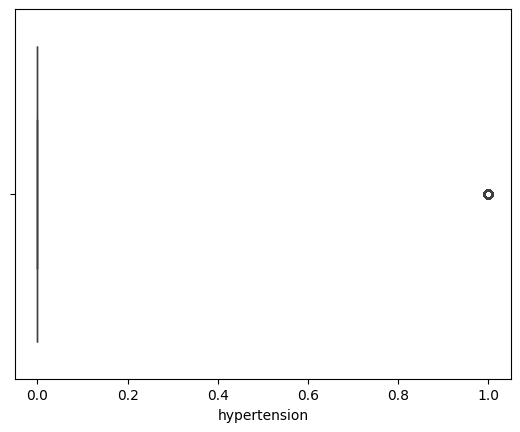

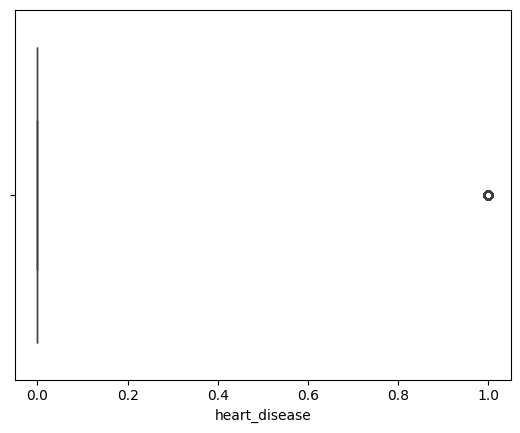

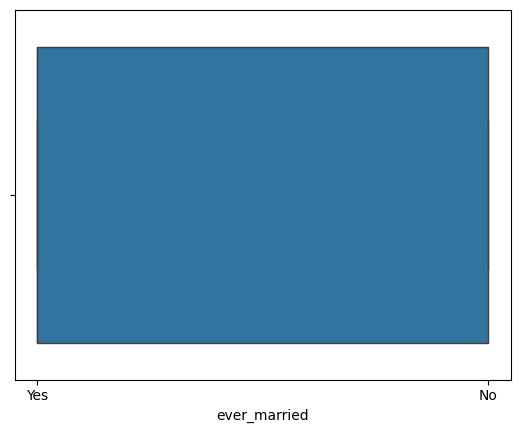

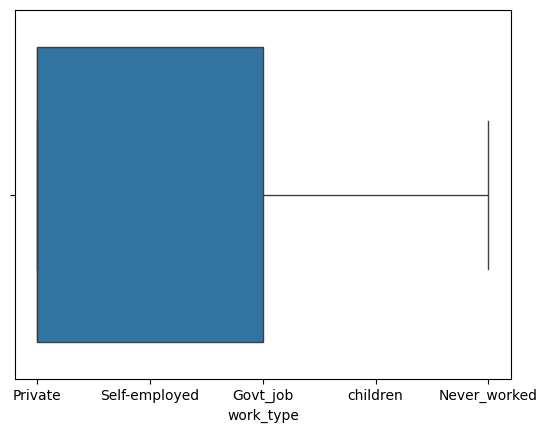

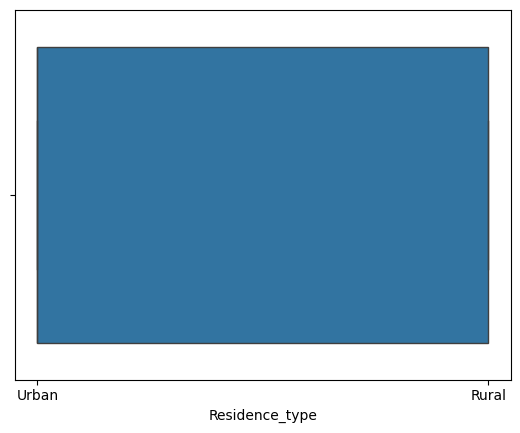

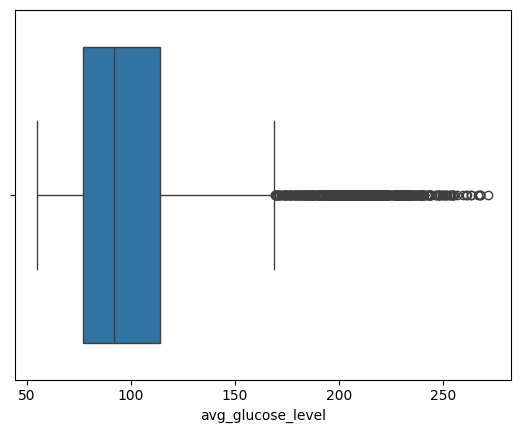

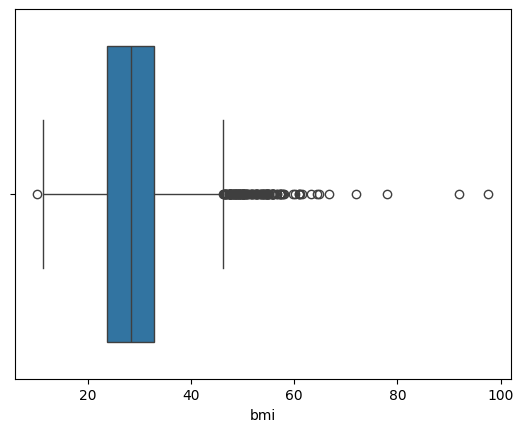

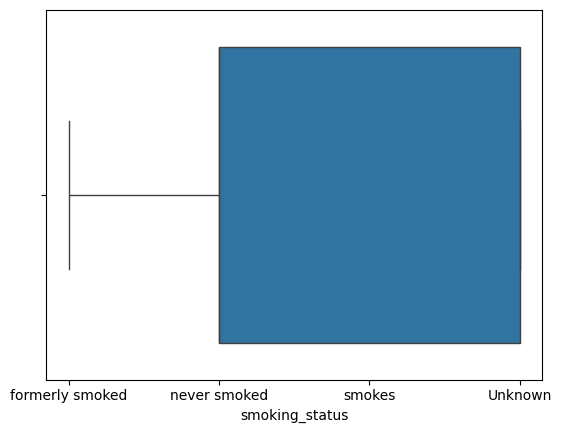

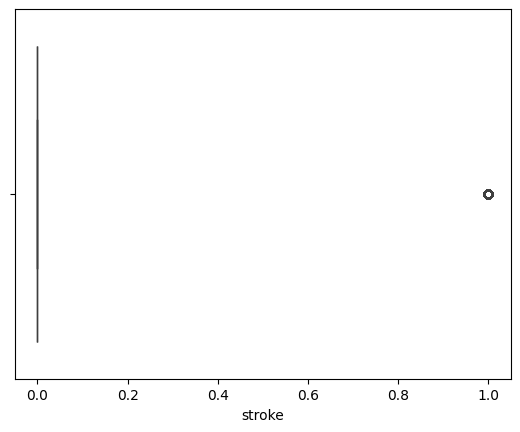

In [ ]:
for i in data.columns:

  sns.boxplot(x=data[i])
  plt.show()

# Data Exploration & preparation:

To convert objects into numerical values using labelencoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
labelfit= le.fit(data['work_type'])
data['work_type']= labelfit.transform(data['work_type'])

le1= LabelEncoder()
labelfit= le1.fit(data['smoking_status'])
data['smoking_status']= labelfit.transform(data['smoking_status'])

le2= LabelEncoder()
labelfit= le2.fit(data['ever_married'])
data['ever_married']= labelfit.transform(data['ever_married'])

le3= LabelEncoder()
labelfit= le3.fit(data['Residence_type'])
data['Residence_type']= labelfit.transform(data['Residence_type'])

le4= LabelEncoder()
labelfit= le4.fit(data['gender'])
data['gender']= labelfit.transform(data['gender'])

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228.69,36.600000,1,1
1,0,61,0,0,1,3,0,202.21,28.893237,2,1
2,1,80,0,1,1,2,0,105.92,32.500000,2,1
3,0,49,0,0,1,2,1,171.23,34.400000,3,1
4,0,79,1,0,1,3,0,174.12,24.000000,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   int64  
 1   age                5109 non-null   int64  
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   int64  
 5   work_type          5109 non-null   int64  
 6   Residence_type     5109 non-null   int64  
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   int64  
 10  stroke             5109 non-null   int64  
dtypes: float64(2), int64(9)
memory usage: 479.0 KB


In [ ]:
data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
corr_matrix=data.corr()['stroke']
corr_matrix

gender               0.009081
age                  0.245109
hypertension         0.127891
heart_disease        0.134905
ever_married         0.108299
work_type           -0.032323
Residence_type       0.015415
avg_glucose_level    0.131991
bmi                  0.038912
smoking_status       0.028108
stroke               1.000000
Name: stroke, dtype: float64

In [ ]:
x=data.iloc[:,0:-1]
y=data['stroke']

In [ ]:
x.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67,0,1,1,2,1,228.69,36.600000,1
1,0,61,0,0,1,3,0,202.21,28.893237,2
2,1,80,0,1,1,2,0,105.92,32.500000,2
3,0,49,0,0,1,2,1,171.23,34.400000,3
4,0,79,1,0,1,3,0,174.12,24.000000,2


Train_test_split the data:

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

To standardize the data:

In [ ]:
from sklearn.preprocessing import StandardScaler
std= StandardScaler()

std.fit(x_train)
x_train= std.transform(x_train)

std.fit(x_test)
x_test= std.transform(x_test)

In [ ]:
import pickle
filename1='std.sav'
pickle.dump(std,open(filename1,'wb'))

In [ ]:
y_train.value_counts()

stroke
0    3892
1     195
Name: count, dtype: int64

balanced value_counts are found in stroke column

Balancing the unbalanced data using Smote :

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()


In [ ]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [ ]:
y_train.value_counts()

stroke
0    3892
1    3892
Name: count, dtype: int64

# Model Training:

To import necessary algorithms:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score, ConfusionMatrixDisplay,precision_score,recall_score

To build the models of different algorithms

In [ ]:
models={'KNN':KNeighborsClassifier(n_neighbors=5),
        'GaussianNB':GaussianNB(),
        'Decision Tree':DecisionTreeClassifier(max_depth=5, criterion='entropy'),
        'SVM': SVC(kernel='rbf'),
        'LogisticRegression':LogisticRegression(),
        'RandomForestClassifier': RandomForestClassifier(n_estimators=20,criterion='gini',max_depth=5,max_features=5)}

# Model Evaluation:

KNN
Model performance for training set
Accuracy:  0.8082191780821918
Precision:  0.09659090909090909
Recall:  0.3148148148148148
confusion matrix:  [[809 159]
 [ 37  17]]
              precision    recall  f1-score   support

           0       0.96      0.84      0.89       968
           1       0.10      0.31      0.15        54

    accuracy                           0.81      1022
   macro avg       0.53      0.58      0.52      1022
weighted avg       0.91      0.81      0.85      1022



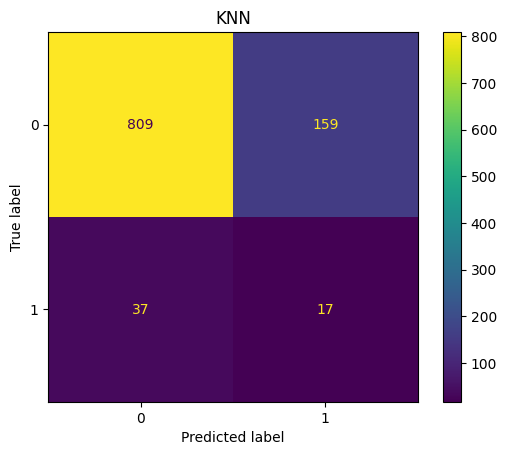

----------------------------------------------------------------------------------------------------
GaussianNB
Model performance for training set
Accuracy:  0.735812133072407
Precision:  0.125
Recall:  0.6666666666666666
confusion matrix:  [[716 252]
 [ 18  36]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.84       968
           1       0.12      0.67      0.21        54

    accuracy                           0.74      1022
   macro avg       0.55      0.70      0.53      1022
weighted avg       0.93      0.74      0.81      1022



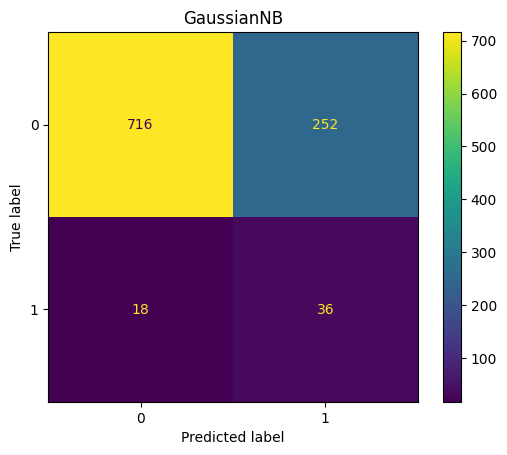

----------------------------------------------------------------------------------------------------
Decision Tree
Model performance for training set
Accuracy:  0.5166340508806262
Precision:  0.09259259259259259
Recall:  0.9259259259259259
confusion matrix:  [[478 490]
 [  4  50]]
              precision    recall  f1-score   support

           0       0.99      0.49      0.66       968
           1       0.09      0.93      0.17        54

    accuracy                           0.52      1022
   macro avg       0.54      0.71      0.41      1022
weighted avg       0.94      0.52      0.63      1022



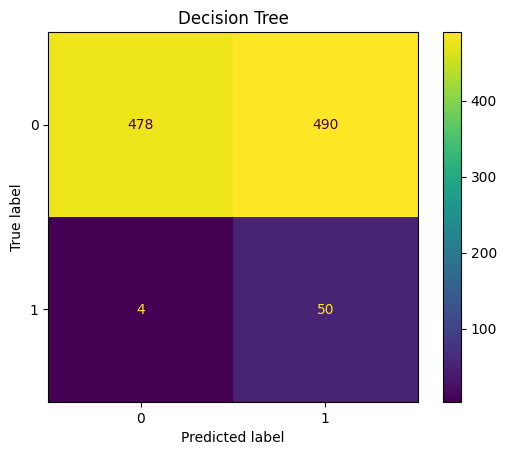

----------------------------------------------------------------------------------------------------
SVM
Model performance for training set
Accuracy:  0.7788649706457925
Precision:  0.12931034482758622
Recall:  0.5555555555555556
confusion matrix:  [[766 202]
 [ 24  30]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87       968
           1       0.13      0.56      0.21        54

    accuracy                           0.78      1022
   macro avg       0.55      0.67      0.54      1022
weighted avg       0.93      0.78      0.84      1022



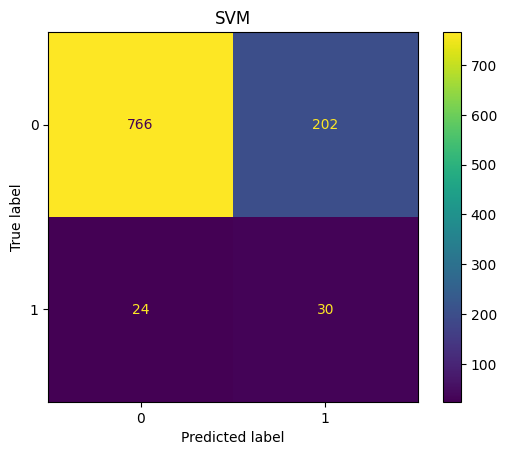

----------------------------------------------------------------------------------------------------
LogisticRegression
Model performance for training set
Accuracy:  0.7485322896281801
Precision:  0.13620071684587814
Recall:  0.7037037037037037
confusion matrix:  [[727 241]
 [ 16  38]]
              precision    recall  f1-score   support

           0       0.98      0.75      0.85       968
           1       0.14      0.70      0.23        54

    accuracy                           0.75      1022
   macro avg       0.56      0.73      0.54      1022
weighted avg       0.93      0.75      0.82      1022



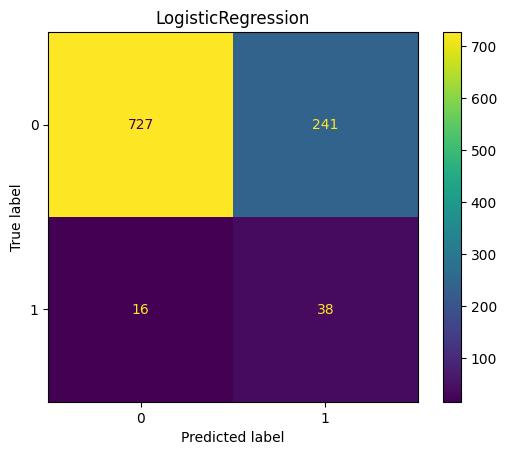

----------------------------------------------------------------------------------------------------
RandomForestClassifier
Model performance for training set
Accuracy:  0.6937377690802349
Precision:  0.12244897959183673
Recall:  0.7777777777777778
confusion matrix:  [[667 301]
 [ 12  42]]
              precision    recall  f1-score   support

           0       0.98      0.69      0.81       968
           1       0.12      0.78      0.21        54

    accuracy                           0.69      1022
   macro avg       0.55      0.73      0.51      1022
weighted avg       0.94      0.69      0.78      1022



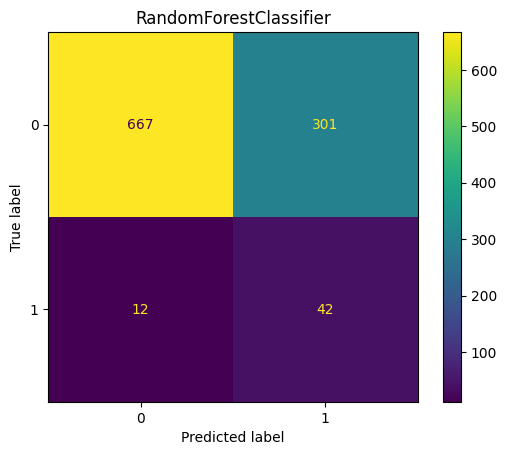

----------------------------------------------------------------------------------------------------


In [ ]:
for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train) # Train model

  #Make prediction:
  y_pred=model.predict(x_test)

  # Training set performance
  accuracy=accuracy_score(y_test,y_pred)
  precision=precision_score(y_test,y_pred,average='binary')
  recall=recall_score(y_test,y_pred,average='binary')
  cm=confusion_matrix(y_test,y_pred)



  print(list(models.keys())[i])

  print('Model performance for training set')

  print('Accuracy: ',accuracy)

  print('Precision: ',precision)
  print('Recall: ',recall)
  print('confusion matrix: ',cm)

  print(classification_report(y_test,y_pred))

  display=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

  display.plot()
  plt.title(list(models.keys())[i])
  plt.show()
  print('-'*100)


Among the above models built using different algorithms, model build using k- nearest neighbour algorithm has more accuracy score.

In [ ]:
knn_model=KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
import pickle
filename='knn_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
y_pred=knn_model.predict(x_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [ ]:
print(y_test)

42      1
380     0
1559    0
352     0
3639    0
       ..
3577    0
660     0
57      1
4267    0
4764    0
Name: stroke, Length: 1022, dtype: int64


In [ ]:
training_score=knn_model.score(x_train,y_train)
training_score

0.9409044193216856

In [ ]:
testing_score=knn_model.score(x_test,y_test)
testing_score


0.8082191780821918

In [ ]:
y_result=knn_model.predict(std.transform([[1,80,0,1,1,2,0,105.92,32.500000,2]]))
y_result

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([1])

CONCLUSION:

The model built by K-Nearest Neighbour shows maximum accuracy of 80%.So, it is the best model. Here, model has high performance on the training set and performance on the test set is comparatively less than training set.The large discrepancy between the training and testing scores is a classic sign of overfitting.